# TP3 EXO 1 : Simulation loi de Poisson

on peut découper la surface bombardée en 𝑁 zones (cases) de même aire et on compte le nombre de surfaces ayant reçu 0 impact, 1 impact, 2 impacts, etc ..., on affiche alors l’histogramme représentant le nombre de cases en fonction du 
nombre d’impacts. Si l’histogramme obtenu est proche de celui d’une loi de Poisson de paramètre  𝜆 =537/𝑁  (nombre moyen d’impacts par zone) alors cela signifie que les bombardements ont été faits au hasard. 
 
Objectif : simuler un bombardement aléatoire de 537 impacts sur une surface carrée contenant 24×24=576 cases

### 1. Creation de la zone et bombardement

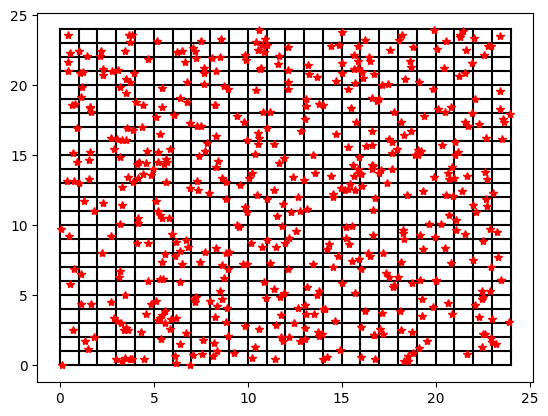

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import math

# Création de la grille (enonce)
ncases=24;
plt.figure()
cx = np.arange(ncases + 1)
cy = np.arange(ncases + 1)
CX, CY = np.meshgrid(cx, cy)
plt.plot(CX, CY, 'k')
plt.plot(CX.T, CY.T, 'k')

# Bombardement
M = np.zeros((ncases, ncases))
nimpacts = 537

for i in range(nimpacts):
    x = 24*np.random.rand()    
    y = 24*np.random.rand()
    M[int(x)][int(y)] += 1
    plt.plot(x,y,'*r')      #affichage


M = M.flatten()     # elle transforme une matrice 2D en une matrice 1D

### 2. Histogramme et Comparaison avec la loi de Poisson theorique

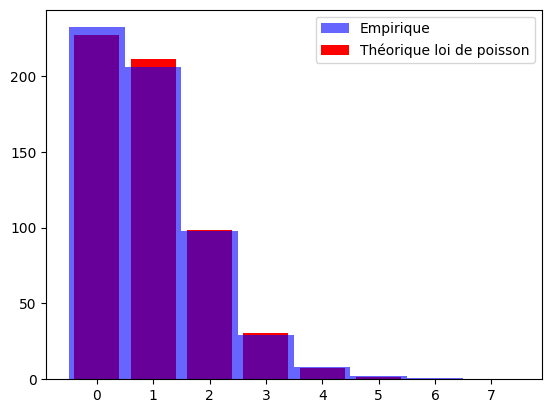

L ecart type de la loi de poisson est 0.9655525188547056
L ecart type expermiental est 0.9968347257625565


In [15]:
# theorie
N = ncases*ncases
lambda_p = nimpacts / N    #nmb moyen d'impact par case

# loi de poisson
k = np.arange(0,np.max(M)+1)    #[0, max d'impacts sur une case]   
theo =  (np.exp(-lambda_p)*lambda_p**k) / gamma(k+1)      # gamma factoriel
plt.bar(k, theo*N, color="red", label="Théorique loi de poisson")

# experimental
plt.hist(M, bins=np.arange(0, np.max(M+1)+2) - 0.5, alpha = 0.6, color= 'blue', label="Empirique") 
plt.legend()
plt.show()

# conclusion
print('L ecart type de la loi de poisson est', np.sqrt(lambda_p))
print('L ecart type expermiental est', np.std(M))

### Conclusion

Attention à  ne  pas  se  tromper  dans  l’interprétation  de  cette  simulation ;  nous  sommes  en  présence  ici  de  deux  lois  de 
probabilité : une loi uniforme et une loi de Poisson. En effet, la probabilité d’impact est partout la même (loi uniforme), 
mais cela a pour conséquence que la variable aléatoire qui représente le nombre d’impacts suit, elle, une loi de Poisson. 

Les ecarts type sont très proches l'un de l'autre, ce qui suggère que la simulation est bien conforme aux attentes théoriques de la loi de Poisson. 
La proximité des valeurs indique que la distribution des impacts sur les cases suit effectivement le modèle de Poisson prévu

Il est essentiel de rappeler que nous avons deux lois de probabilité en jeu : la loi uniforme pour le placement des impacts (chaque case a une probabilité égale de recevoir un impact) et la loi de Poisson pour la distribution des impacts (la variable aléatoire représentant le nombre d'impacts par case suit une loi de Poisson).
Cela souligne l'importance de bien distinguer entre les probabilités de placement et la distribution des résultats. Bien que chaque case ait la même probabilité d'être touchée, le nombre d'impacts reçus par case est sujet à la variabilité prédite par la loi de Poisson.

les impacts peuvent être considérés comme un phénomène aléatoire. Cela suggère également que, dans le cadre de cette simulation, il n'y a pas d'indication claire que certaines zones ont été spécifiquement visées, conformément à l'hypothèse d'égalité de probabilité pour chaque case.